# Baseline: ecapa

In [15]:
from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import os
import matplotlib.pyplot as plt
from features.similarity import pipeline

## Configuration

In [16]:
model_name='spkrec-xvect-voxceleb'
dir='speaker'
root=os.path.join('results/encoder',model_name,dir)

## Data preparation

In [17]:
train, val, test=pipeline(model_name,dir,root)

openrir/rirs_noises.zip exists. Skipping download
openrir/rirs_noises.zip exists. Skipping download
openrir/rirs_noises.zip exists. Skipping download
openrir/rirs_noises.zip exists. Skipping download


## Visualization

In [18]:
def visualize(dataset):
    plt.scatter(dataset[:,0],dataset[:,1],c=dataset[:,2])
    plt.xlabel('mean')
    plt.ylabel('std')
    plt.show()

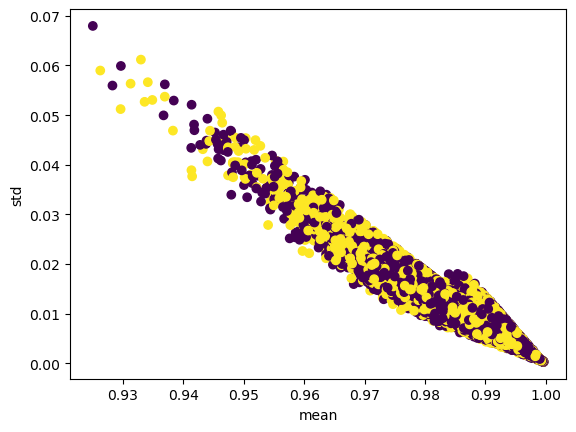

In [19]:
visualize(train)

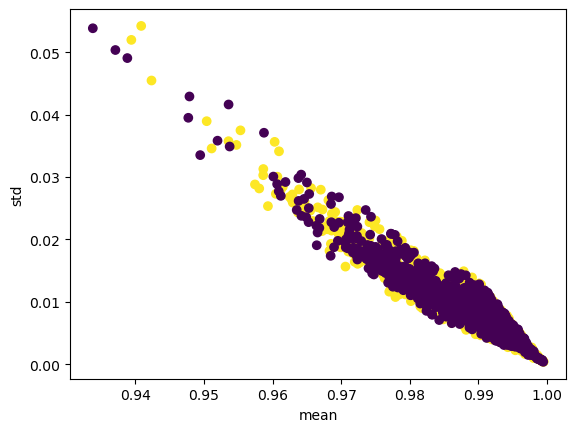

In [20]:
visualize(val)

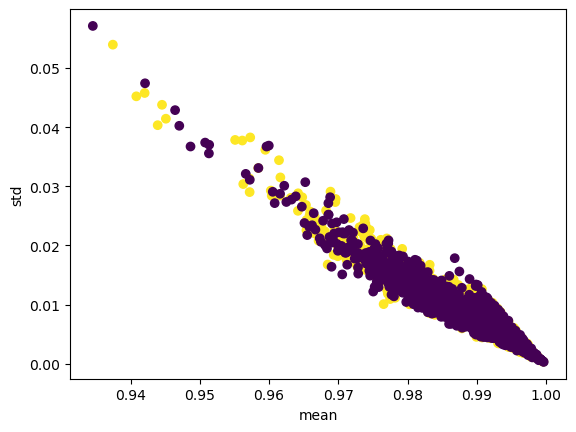

In [21]:
visualize(test)

## Evaluation

In [22]:
def classify(classifier, train, test):
    classifier.fit(train[:,:-1], train[:,-1])
    pred=classifier.predict(test[:,:-1])
    print(classification_report(test[:,-1],pred))
    RocCurveDisplay.from_estimator(classifier,test[:,:-1],test[:,-1])
    plt.show()

              precision    recall  f1-score   support

         0.0       0.50      0.57      0.53      1000
         1.0       0.49      0.42      0.46      1000

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



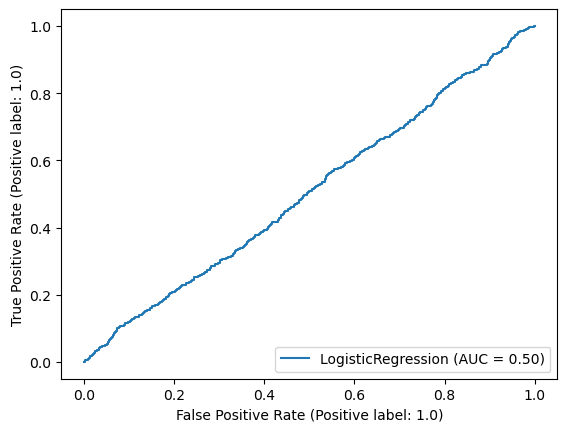

In [23]:
classify(LogisticRegression(),train,test)

              precision    recall  f1-score   support

         0.0       0.50      0.98      0.66      1000
         1.0       0.53      0.02      0.04      1000

    accuracy                           0.50      2000
   macro avg       0.51      0.50      0.35      2000
weighted avg       0.51      0.50      0.35      2000



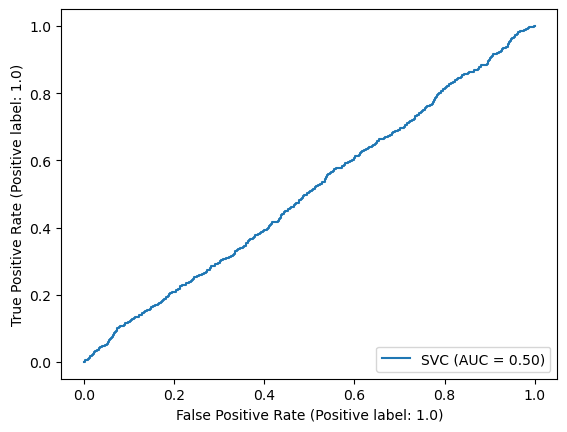

In [24]:
classify(SVC(),train,test)

              precision    recall  f1-score   support

         0.0       0.49      0.49      0.49      1000
         1.0       0.50      0.50      0.50      1000

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000



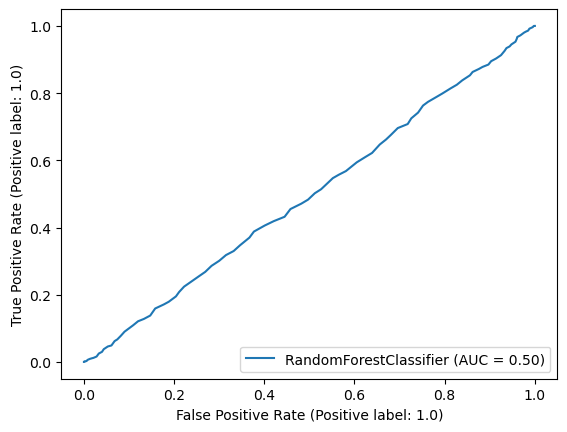

In [25]:
classify(RandomForestClassifier(),train,test)

              precision    recall  f1-score   support

         0.0       0.50      0.59      0.54      1000
         1.0       0.50      0.40      0.44      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



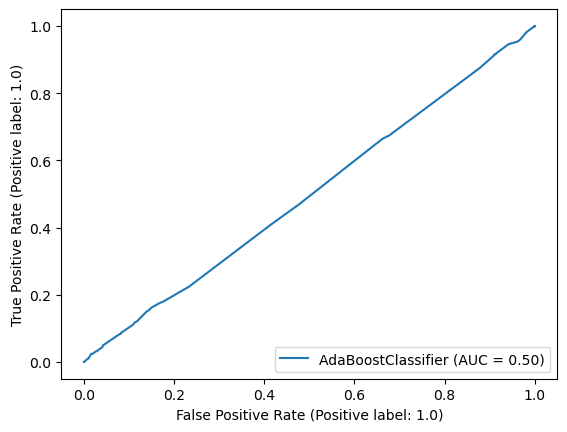

In [26]:
classify(AdaBoostClassifier(),train,test)

              precision    recall  f1-score   support

         0.0       0.50      0.65      0.57      1000
         1.0       0.50      0.35      0.41      1000

    accuracy                           0.50      2000
   macro avg       0.50      0.50      0.49      2000
weighted avg       0.50      0.50      0.49      2000



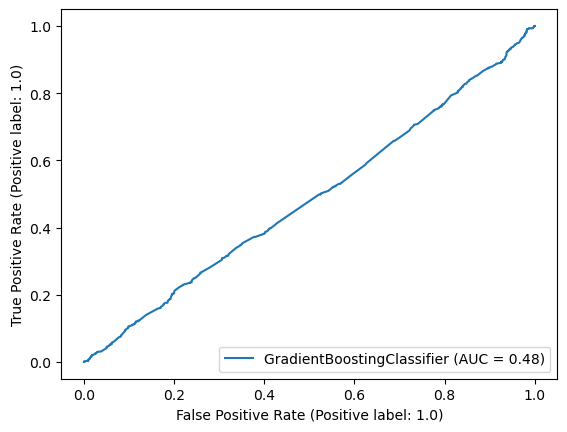

In [27]:
classify(GradientBoostingClassifier(),train,test)

              precision    recall  f1-score   support

         0.0       0.50      0.97      0.66      1000
         1.0       0.55      0.03      0.06      1000

    accuracy                           0.50      2000
   macro avg       0.53      0.50      0.36      2000
weighted avg       0.53      0.50      0.36      2000



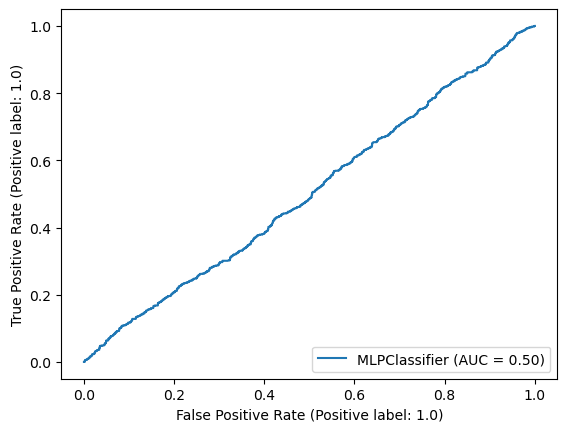

In [28]:
classify(MLPClassifier(),train,test)